# Portfolio Project - US Medical Insurance

The following is an exploritory analysis of a dataset including general medical and medical insurance information.

### Goals:
 - Identify if any data cleaning is needed.
 - Perform initial EDA on the dataset, and determine if there is any correlation between variables.
 - Prepare the dataset for Tableau.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#importing dataset
insurance_data = pd.read_csv('insurance.csv')

print(insurance_data.head())

insurance_columns = [insurance_data.columns[i] for i in range(len(insurance_data.columns))]

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Data Cleaning & Initial Review

Before any additional review of the data, I will quickly confirm the state of the data to ensure no modifications are required.

In [3]:
#confirming column data types
print(insurance_data.dtypes)

print(insurance_data.describe())

print(insurance_data.info())

# confirming that no null values require updating
for i in range(len(insurance_columns)):
    print(insurance_data[insurance_columns[i]].unique())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children 

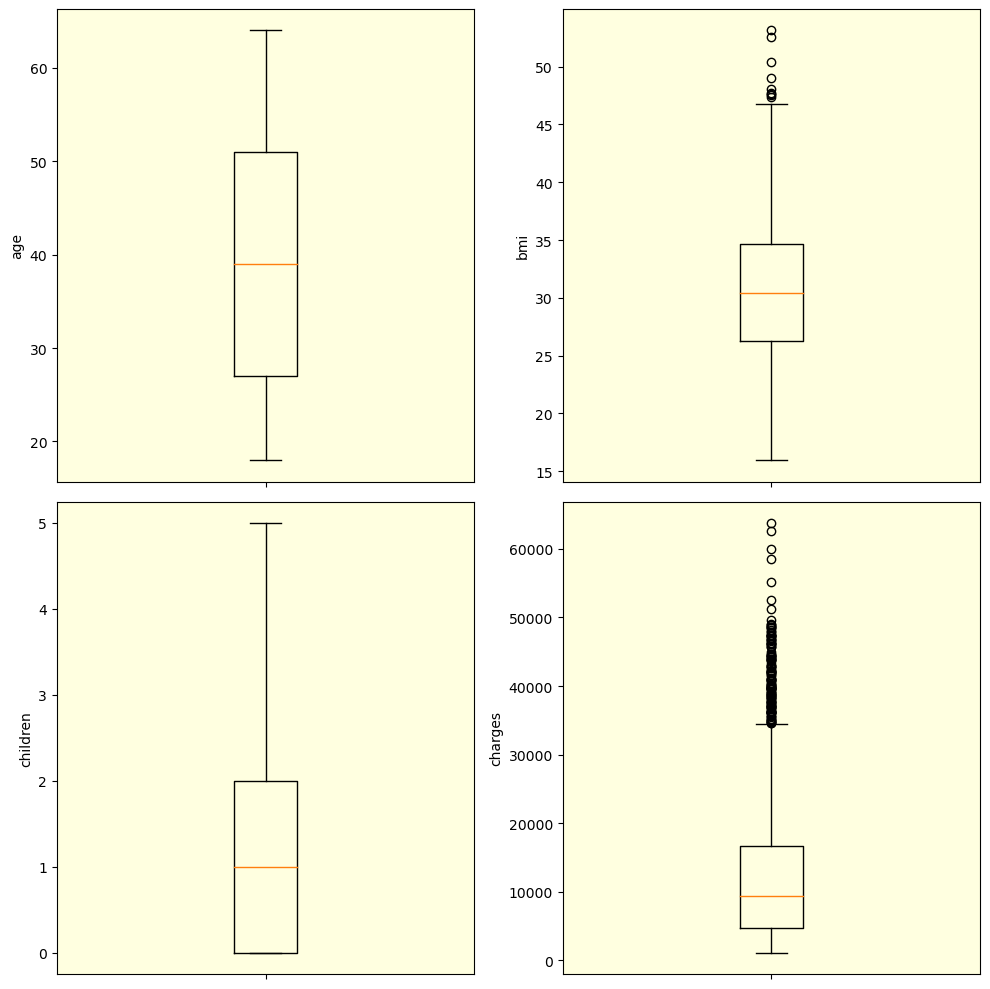

In [4]:
#confirming that there are no outliers within our sets of continuous data.

numerical_vars = ['age','bmi','children','charges']

fig, axs = plt.subplots(nrows=2, ncols=2, layout=None, figsize=(10,10))
sub_plot = 0

for i in range(len(numerical_vars)):
    sub_plot += 1
    ax = plt.subplot(2,2,sub_plot)
    plt.boxplot(insurance_data[numerical_vars[i]])
    plt.ylabel(numerical_vars[i])
    ax.set_xticks([1])
    ax.set_xticklabels('')
    ax.set_facecolor('lightyellow')
    plt.tight_layout()

As seen in the previous boxplots, it appears that there may be a few outliers in BMI and charges. BMI has a couple of data points above the upper bound, while a multitude of insurance charges appear as outliers, above the upper bound (third quartile + iqr * 1.5). I will update our dataset below to remove these datapoints prior to analysis.

In [9]:
# Identifying outliers in BMI and Charges variables, and removing them from the dataset.
#BMI upper and lower bounds

q1_bmi = np.quantile(insurance_data['bmi'], 0.25)
q3_bmi = np.quantile(insurance_data['bmi'], 0.75)
iqr_bmi = q3_bmi - q1_bmi

upper_bmi = q3_bmi + 1.5*iqr_bmi

# Create arrays of Boolean values indicating the outlier rows (only requires upper arrays)
upper_array_bmi = np.where(insurance_data['bmi']>=upper_bmi)[0]

# Removing the outliers
# insurance_data.drop(index=upper_array_bmi, inplace=True)

In [10]:
q1_charges = np.quantile(insurance_data['charges'], 0.25)
q3_charges = np.quantile(insurance_data['charges'], 0.75)
iqr_charges = q3_charges - q1_charges

print(q1_charges)
print(q3_charges)

upper_charges = (q3_charges + 1.5*iqr_charges)

print(upper_charges)
upper_array_charges = np.where(insurance_data['charges']>=upper_charges)[0]
# insurance_data.drop(index=upper_array_charges, inplace=True)

4408.695900000001
12953.5946
25770.94265


## Exploritory Data Analysis

Questions to answer:
 - Where does the avereage amount spent fall for all members?
 - What is the correlation between insurance cost and each of the variables available?
 - Is a specific region of the country more expensive in terms of insurance cost?
 - Difference in costs based on sex?
 - Change in insurance costs based on age

### What is the average amount of charges per member?

In [246]:
#first, I want to determine if there are any outliers in charges which we will need to account for.
np.

### What is the correlation between insurance cost and each of the variables available?

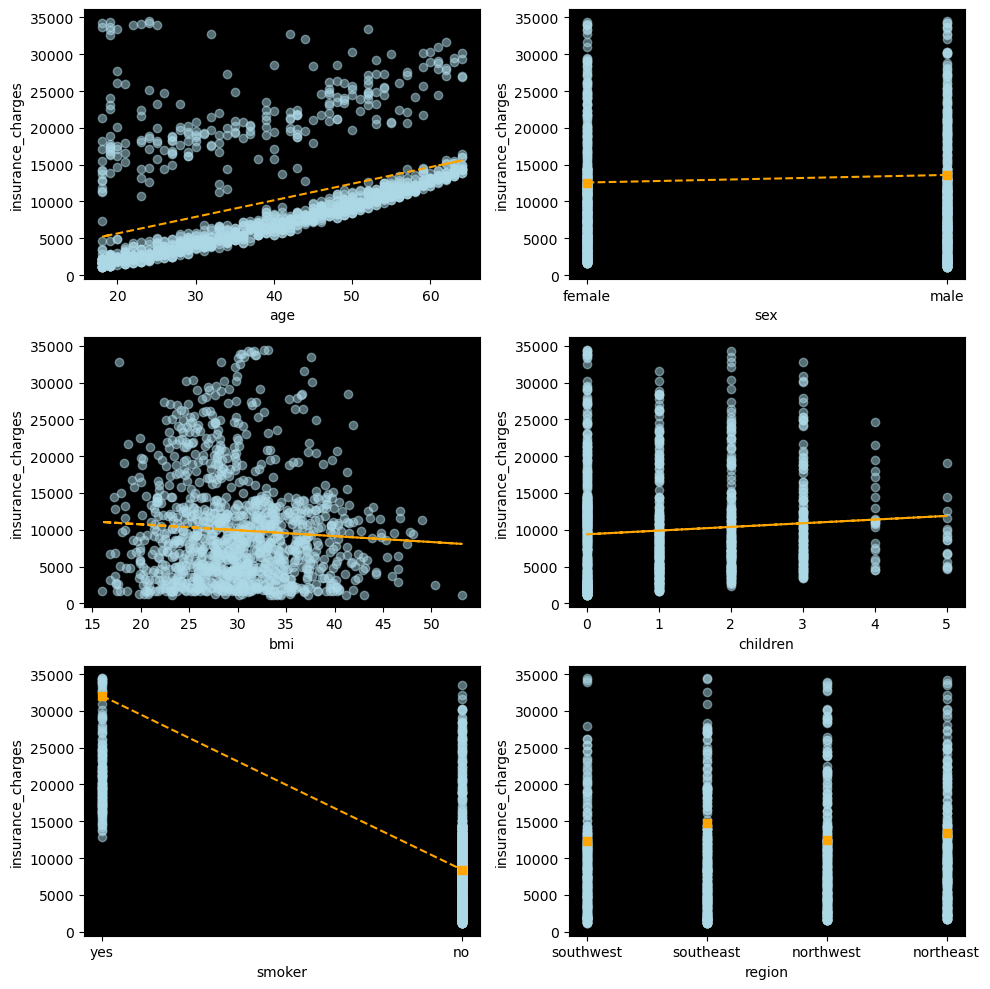

In [11]:
#What is the correlation between insurance cost and each of the variables available?


#setting up figure for looping through each of the variables available.
fig, axs = plt.subplots(nrows=3, ncols=2, layout=None, figsize=(10,10))

sp_count = 0

insurance_columns = [insurance_data.columns[i] for i in range(len(insurance_data.columns))]

for i in range(0,6):
    sp_count += 1
    current_field = insurance_columns[i]
    
    #creating scatterplots for each variable
    ax = plt.subplot(3, 2, sp_count)
    plt.scatter(insurance_data[current_field], insurance_data.charges, alpha=0.5,\
                color='lightblue')
    
    #cosmetics
    ax.set_facecolor('black')
    plt.xlabel(current_field)
    plt.ylabel('insurance_charges')
    plt.tight_layout()

#fitting linear regression lines for categorical variables (smoking, sex)

# print(insurance_data.groupby('sex').mean().charges)
mean_charges_female = 12569.58
mean_charges_male = 13596.75
# print(insurance_data.groupby('smoker').mean().charges)
mean_charges_nonsmoker = 8434.27
mean_charges_smoker = 32050.23
# print(insurance_data.groupby('region').mean().charges)
mean_charges_region = {'southwest':12346.94, 'southeast':14735.41, 'northwest':12417.58, 'northeast':13406.38}

    #plotting line for mean charges by sex
plt.subplot(3,2,2)
plt.plot([0,1], [mean_charges_female, mean_charges_male], color ='orange', linestyle = '--', marker = 's')

    #plotting line for mean charges by smoking status
plt.subplot(3,2,5)
plt.plot([0,1], [mean_charges_smoker, mean_charges_nonsmoker], color = 'orange', linestyle = '--', marker = 's')

    #plotting line for mean charges by region
ax = plt.subplot(3,2,6)
plt.scatter([0,1,2,3], mean_charges_region.values(), color ='orange', marker = 's')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(mean_charges_region.keys())

#fitting linear regression lines for numeric variables
    #age
plt.subplot(3,2,1)
m, b = np.polyfit(insurance_data['age'], insurance_data.charges, 1)
plt.plot(insurance_data['age'], (m*insurance_data['age']+b), color = 'orange', linestyle = '--')

    #bmi
plt.subplot(3,2,3)
m, b = np.polyfit(insurance_data['bmi'], insurance_data.charges, 1)
plt.plot(insurance_data['bmi'], (m*insurance_data['bmi']+b), color = 'orange', linestyle = '--')

    #children
plt.subplot(3,2,4)
m, b = np.polyfit(insurance_data['children'], insurance_data.charges, 1)
plt.plot(insurance_data['children'], (m*insurance_data['children']+b), color = 'orange', linestyle = '--')

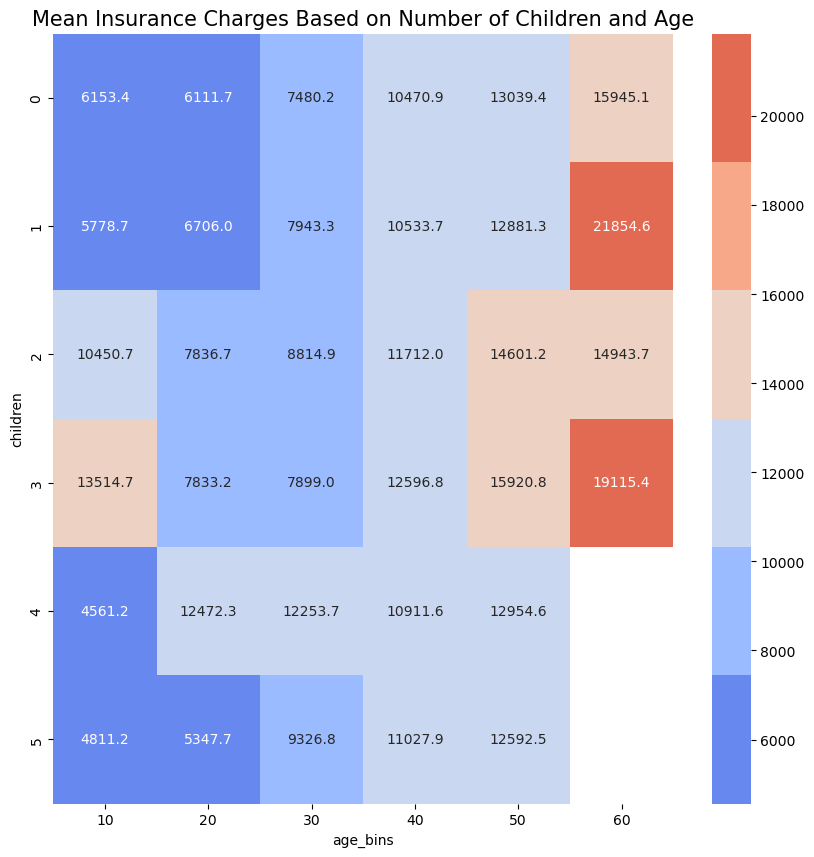

<Figure size 640x480 with 0 Axes>

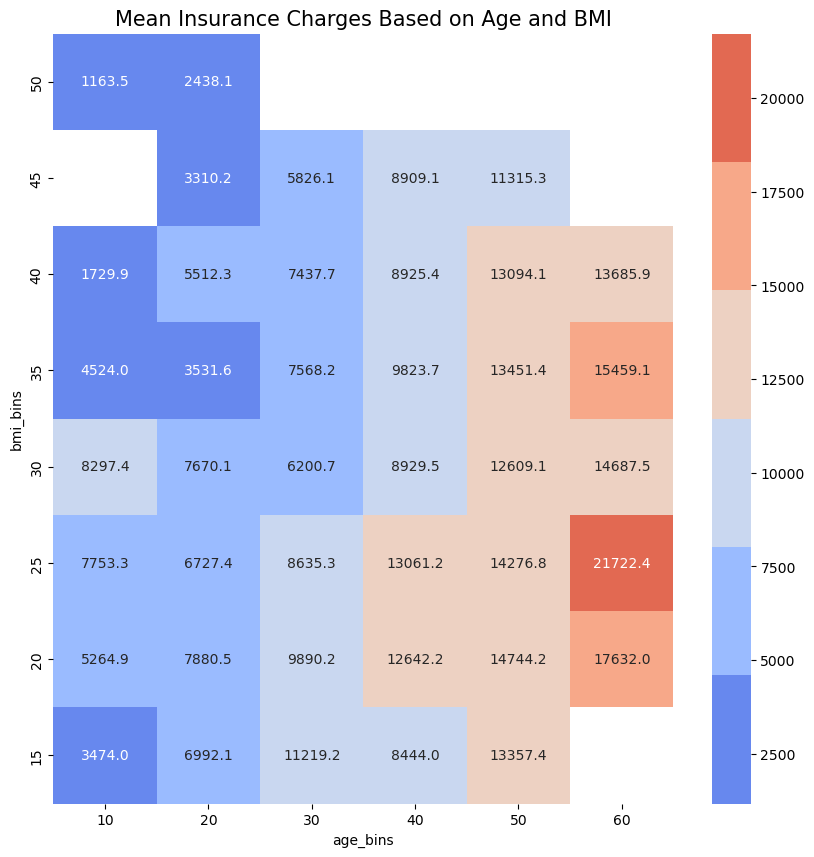

<Figure size 640x480 with 0 Axes>

In [12]:
#I am intrigued by the impact that the number of childre, age, and bmi have on insurance costs. 
#Is there a "sweet spot" where these variables make for the most insurance charges based on the dataset?

#adding additional fields to dataframe for age and bmi bins
insurance_data['age_bins'] = pd.cut(x=insurance_data['age'], bins=[10,20,30,40,50,60,70,80,90], labels = [10,20,30,40,50,60,70,80])

insurance_data['bmi_bins'] = pd.cut(x=insurance_data['bmi'], bins=[5,10,15,20,25,30,35,40,45,50,55,60], labels = [5,10,15,20,25,30,35,40,45,50,55])

#creating pivot tables for heat maps
age_children_charges = insurance_data.pivot_table(columns='age_bins', values='charges', index='children',\
                                                  aggfunc='mean')
age_bmi_charges = insurance_data.pivot_table(columns='age_bins', values='charges', index='bmi_bins',\
                                                  aggfunc='mean')

#heatmap for num_children, age, and insurance charges
fig = plt.figure(figsize=(10,10))
sns.heatmap(age_children_charges, annot=True, fmt = "0.1f",cmap=sns.color_palette('coolwarm'))
plt.title('Mean Insurance Charges Based on Number of Children and Age', fontsize=15)
plt.show()
plt.tight_layout()
plt.clf()

#heatmap for age, bmi, and insurance charges
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(age_bmi_charges, annot=True, fmt = "0.1f",cmap=sns.color_palette('coolwarm'))
plt.title('Mean Insurance Charges Based on Age and BMI', fontsize=15)
ax.invert_yaxis()
plt.show()
plt.tight_layout()
plt.clf()


#### Chisquare testing/contingency tables
 - out of general curiosity, below is the comparison of numerous variables to identify if there are any unexpected correlations within our dataset.

In [15]:
smoker_children = pd.crosstab(insurance_data.smoker, insurance_data.children)

smoker_sex = pd.crosstab(insurance_data.smoker, insurance_data.sex)

bmi_age = pd.crosstab(insurance_data['bmi'], insurance_data['age'])

sex     female  male
smoker              
no         544   517
yes         68    70


In [20]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(smoker_children)

# interpret p-value (smoker_children)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    
    

stat, p, dof, expected = chi2_contingency(smoker_sex)

# interpret p-value (smoker_sex)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    
    
stat, p, dof, expected = chi2_contingency(bmi_age)

# interpret p-value (smoker_sex)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.7386815861864896
Independent (H0 holds true)
p value is 0.7256247086507401
Independent (H0 holds true)
p value is 0.6554280475940224
Independent (H0 holds true)


In [21]:
#eporting insurance_data for further visualization in Tableau

insurance_data.to_csv('/Users/benjohanski/Desktop/US Medical Insurance Data/insurance_results.csv')